In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
data = pd.read_csv("Income.csv")
# Task 1: Select the given dataset "Income.csv" and calculate the proportion of people (area under curve) and zscore values for loan amount sanctioned between 100 and 160.
#TASK-1

filtered_data = data[(data['LoanAmount'] >= 100) & (data['LoanAmount'] <= 160)]

total_people = len(data)
people_in_range = len(filtered_data)
proportion = people_in_range / total_people

loan_amounts = filtered_data['LoanAmount']
mean_loan_amount = loan_amounts.mean()
std_deviation = loan_amounts.std()

z_scores = (loan_amounts - mean_loan_amount) / std_deviation

print("Proportion of people with loan amounts between 100 and 160:", proportion)
print("\nZ-score values for loan amounts between 100 and 160:\n")
print(z_scores)

Proportion of people with loan amounts between 100 and 160: 0.5367847411444142

Z-score values for loan amounts between 100 and 160:

0     -1.001064
1     -0.068906
3     -1.583662
5      1.445849
7      1.154550
         ...   
359    1.445849
362   -0.826284
363   -0.709765
364   -0.068906
365    1.795408
Name: LoanAmount, Length: 197, dtype: float64


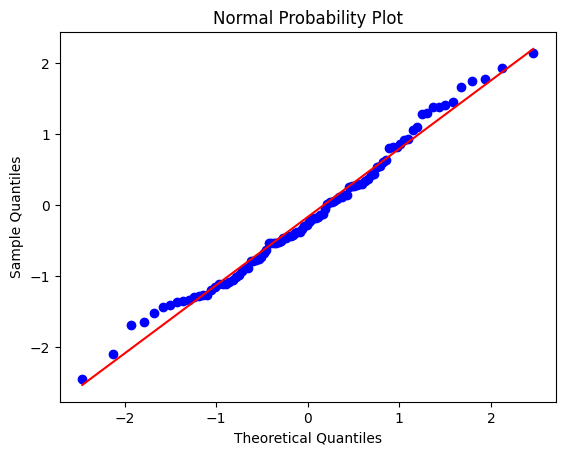

In [3]:
# Task 2: Generate random data (e.g., 100 samples) and create a Normal Probability Plot (NPP) for this data. Analyze the plot and discuss whether the data appears to follow a normal distribution.
#TASK-2

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
n = 100
random_data = np.random.randn(n)

stats.probplot(random_data, dist="norm", plot=plt)
plt.title("Normal Probability Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


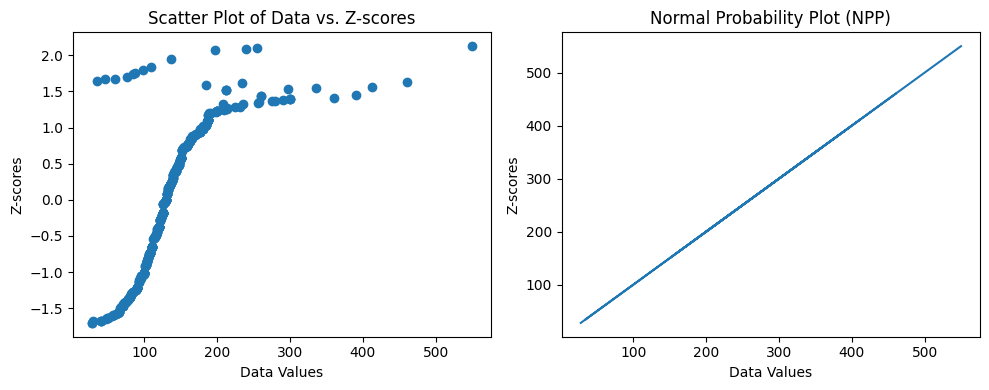

In [4]:
# Task 3: Create NPP for the "LoanAmount" column in given "Income.csv" dataset. Analyse and provide your insights.
#TASK-3

from scipy.stats import zscore, norm

def create_npp(data):
    data = sorted(data)

    p = [(data.index(i) - 0.5) / len(data) for i in data]

    z_scores = zscore(p)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(data, z_scores)
    plt.xlabel('Data Values')
    plt.ylabel('Z-scores')
    plt.title('Scatter Plot of Data vs. Z-scores')

    plt.subplot(1, 2, 2)
    theoretical_z_scores = [norm.ppf(i, np.mean(data), np.std(data)) for i in p]
    plt.plot(data, theoretical_z_scores, 'ro', data, data)
    plt.xlabel('Data Values')
    plt.ylabel('Z-scores')
    plt.title('Normal Probability Plot (NPP)')

    plt.tight_layout()
    plt.show()

df = pd.read_csv('Income.csv')

create_npp(df['LoanAmount'])

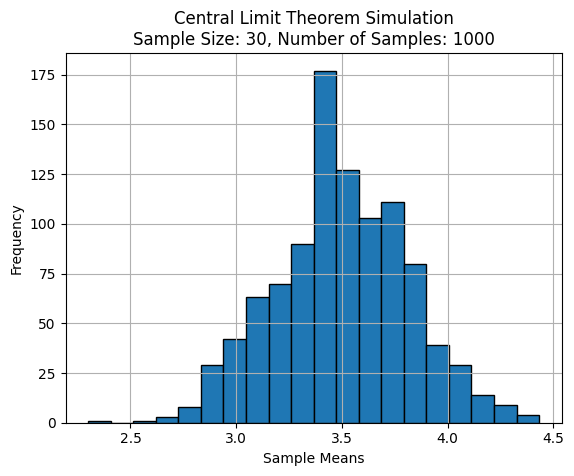

In [5]:
# Task 4: Consider n=30 and p=0.4 as parameters for an unknown binomial distribution. Implement central limit theorem, evaluate 1000 means of sample size 30 and plot the graph for obtained means. Analyse and provide insights about the graph plotted.4
#TASK-4
np.random.seed(42)

def simulate_clt(num_samples, sample_size):
    sample_means = []

    for _ in range(num_samples):
        sample = np.random.randint(1, 7, sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    return sample_means

num_samples = 1000
sample_size = 30

sample_means = simulate_clt(num_samples, sample_size)

plt.hist(sample_means, bins=20, edgecolor='k')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title(f'Central Limit Theorem Simulation\nSample Size: {sample_size}, Number of Samples: {num_samples}')
plt.grid(True)
plt.show()

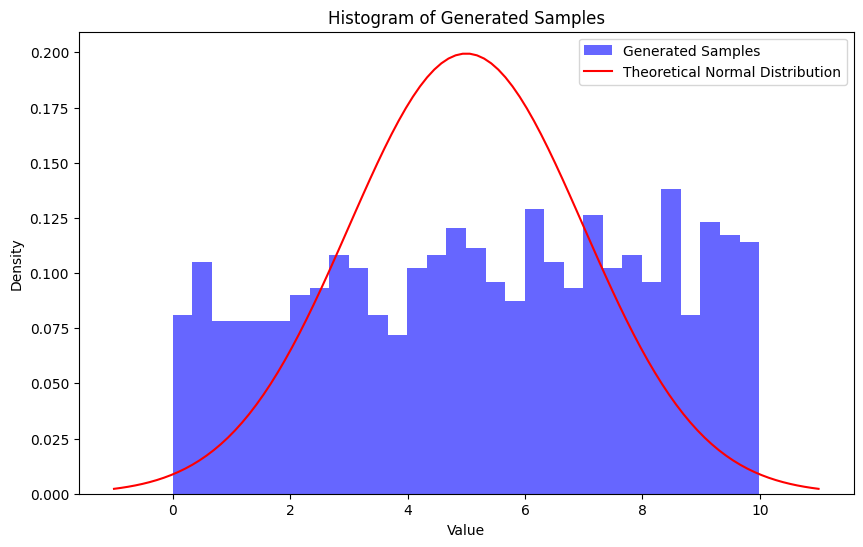

In [6]:
# Task 5: Generate random variables from a normal distribution (parameters: mean:5.0, standard deviation: 2.0 and number of samples:1000) using acceptance-rejection method. Plot a histogram of generated samples.
#TASK-5

import numpy as np
import matplotlib.pyplot as plt

def generate_samples_using_acceptance_rejection(mean, std_dev, num_samples):
    generated_samples = []

    while len(generated_samples) < num_samples:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, norm.pdf(x, mean, std_dev))
        if y < norm.pdf(x, mean, std_dev):
            generated_samples.append(x)

    return generated_samples

mean = 5.0
std_dev = 2.0
num_samples = 1000
generated_samples = generate_samples_using_acceptance_rejection(mean, std_dev, num_samples)

plt.figure(figsize=(10, 6))

plt.hist(generated_samples, bins=30, density=True, alpha=0.6, color='b', label='Generated Samples')
plt.title('Histogram of Generated Samples')
plt.xlabel('Value')
plt.ylabel('Density')

x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', label='Theoretical Normal Distribution')

plt.legend()
plt.show()